# <span style="color:Red">Walkability Modelling Based on TOPSIS Generated Proxy Target Variables</span>

In [1]:
# Let's now do modelling

### <span style="color:green">Load required libraries</span>

In [2]:
#Importing packages for ML pipeline
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
print("Libraries Loaded Successfully!")

Libraries Loaded Successfully!


In [3]:
ml_data_path = "C:/Users/Dell/OneDrive/Desktop/urban-green-spaces/Walkability/Data/Walkability-cleaned.csv"
data = pd.read_csv(ml_data_path, squeeze=True)
data.head()

C:\Users\Dell\AppData\Local\Temp\ipykernel_12272\2824387888.py:2: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  data = pd.read_csv(ml_data_path, squeeze=True)


,geometry,elevation,green-index,population-density,building-density,street-intersection-density,temperature,Topsis Score,walkability_proxy_target
0,"POLYGON ((253012.92065789475 9868497.4528, 253...",1635,0.247765,9.233768,0,0,18.000000,0.009684,0
1,"POLYGON ((253929.66654736843 9868497.4528, 253...",1635,0.247765,3.235362,0,0,18.000000,0.003336,0
2,"POLYGON ((261263.6336631579 9868497.4528, 2612...",1635,0.247765,4.208464,0,0,18.000000,0.004366,0
3,POLYGON ((253012.92065789475 9867559.088446153...,1635,0.247765,9.663217,0,0,18.000000,0.010139,0
4,POLYGON ((253929.66654736843 9867559.088446153...,1771,0.565931,0.887574,0,0,18.958387,0.007106,0


In [4]:
# data = data.copy()
# data = data.drop(["Unnamed: 0"], axis=1)

In [5]:
# drop column features that is not important for our ml model
ml_data = data.copy() # checkpoint
ml_data = ml_data.drop(['geometry', 'Topsis Score'], axis=1)
ml_data.head()

,elevation,green-index,population-density,building-density,street-intersection-density,temperature,walkability_proxy_target
0,1635,0.247765,9.233768,0,0,18.000000,0
1,1635,0.247765,3.235362,0,0,18.000000,0
2,1635,0.247765,4.208464,0,0,18.000000,0
3,1635,0.247765,9.663217,0,0,18.000000,0
4,1771,0.565931,0.887574,0,0,18.958387,0


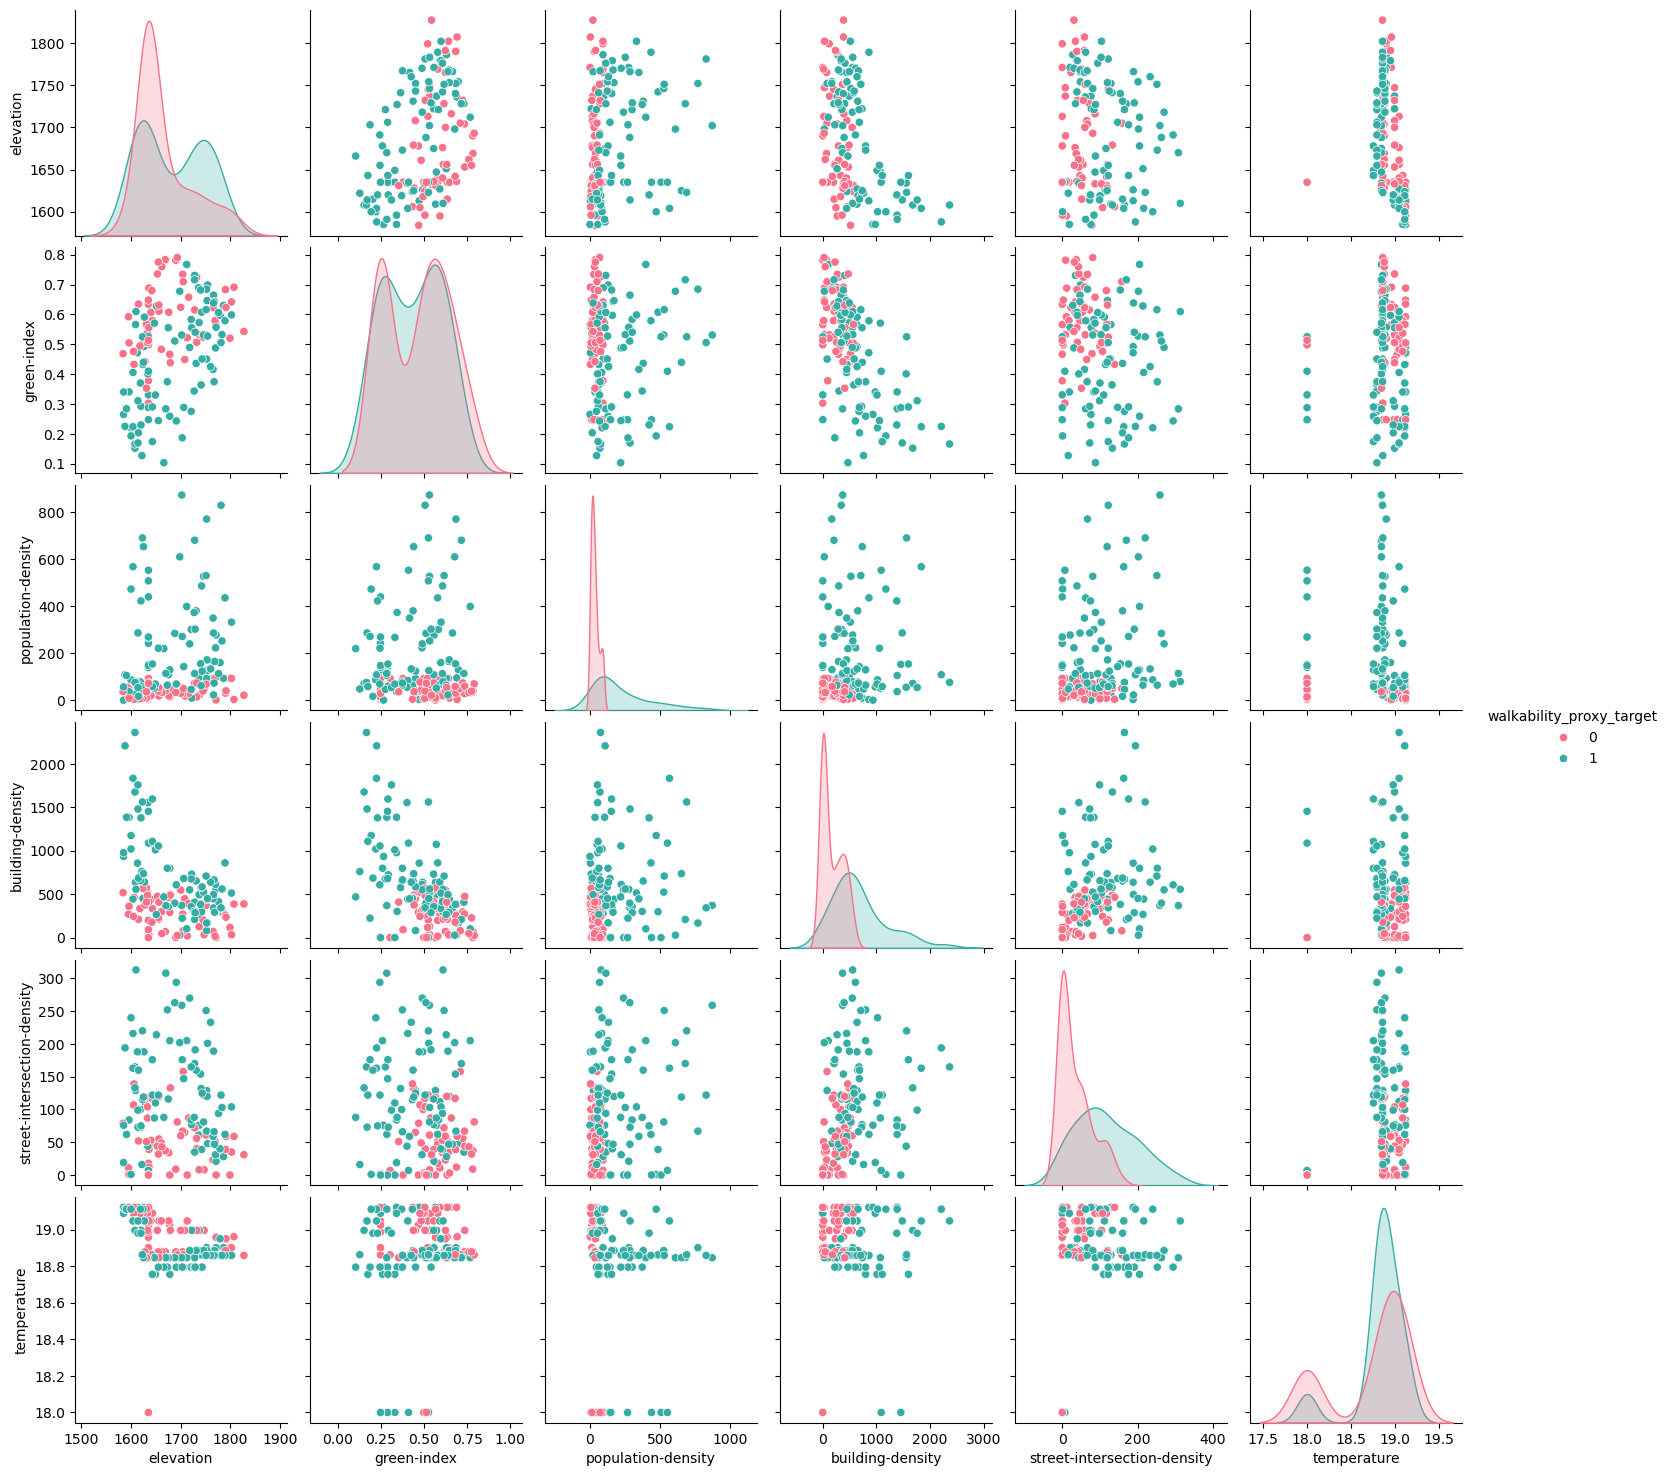

In [6]:
#Pairplot
graph = sns.pairplot(ml_data, hue="walkability_proxy_target", palette="husl")
graph

In [7]:
#Creating test and train datasets
X_train,X_test,y_train,y_test=train_test_split(ml_data.iloc[:,[0,1,2,3,4,5]],ml_data.iloc[:,[6]],test_size=0.25,random_state=159, shuffle=True)

In [8]:
#Defining logistic regression pipeline
LRPL = Pipeline([('myscaler',MinMaxScaler()),   #use StandardScaler when applicable
               ('mypca',PCA(n_components=4)),   #no. of component is researcher-dependent
               ('logistic_classifier',LogisticRegression())])

In [9]:
#Defining decision tree pipeline
DTPL = Pipeline([('myscaler',MinMaxScaler()),
               ('mypca',PCA(n_components=4)),
               ('decisiontree_classifier',DecisionTreeClassifier())])

In [10]:
#Defining random forest pipeline
RFPL = Pipeline([('myscaler',MinMaxScaler()),
               ('mypca',PCA(n_components=4)),
               ('randomforest_classifier',RandomForestClassifier())])

In [11]:
#Defining Gradient Boosting pipeline
GBPL = Pipeline([('myscaler',MinMaxScaler()), #scaling is not required for GB!
               ('mypca',PCA(n_components=4)),
               ('gradientboosting_classifier',GradientBoostingClassifier())])

In [12]:
#Defining pipeline
proxy_pl = [LRPL, DTPL, RFPL, GBPL]

In [13]:
#Defining conditions for selecting the best model
accuracy = 0.0
classifier = 0
pipeline = ""

#Creating dictionary of pipelines and training models
PipelineDict = {0: 'Logistic regression', 1: 'Decision tree', 2: 'Random forest', 3: 'Gradient boosting'}

#Fitting the pipelines
for mypipe in proxy_pl:
    mypipe.fit(X_train, y_train)

c:\Users\Dell\anaconda3\envs\GEE_Python\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Dell\anaconda3\envs\GEE_Python\lib\site-packages\sklearn\pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
c:\Users\Dell\anaconda3\envs\GEE_Python\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [14]:
#Estimating test accuracies for all ML classifiers
for i,model in enumerate(proxy_pl):
    print("Test accuracy of {}: {}".format(PipelineDict[i],model.score(X_test,y_test)))

Test accuracy of Logistic regression: 0.9130434782608695
Test accuracy of Decision tree: 0.9130434782608695
Test accuracy of Random forest: 0.9347826086956522
Test accuracy of Gradient boosting: 0.8913043478260869


## <span style="color:green">Model Evaluation Metrics</span>

From the above model accuracy assessment we can see that Random Forest performs better. Therefore we want to perform model evaluation metrics
based on Random Forest.

In [15]:
# import libraries for model evaluation.
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [16]:
for mypipe in proxy_pl[2]:
    mypipe.fit(X_train, y_train)

C:\Users\Dell\AppData\Local\Temp\ipykernel_12272\2756287577.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  mypipe.fit(X_train, y_train)


In [17]:
y_pred = mypipe.predict(X_test)
y_pred

array([1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1], dtype=int64)

In [18]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9782608695652174


### <span style="color:green">Visualizing the result</span>

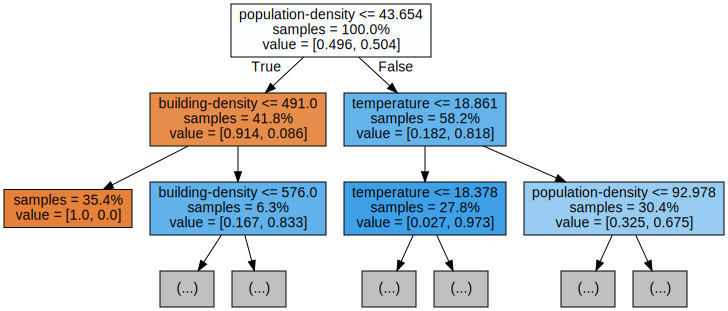

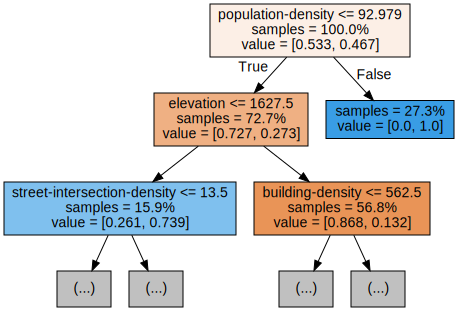

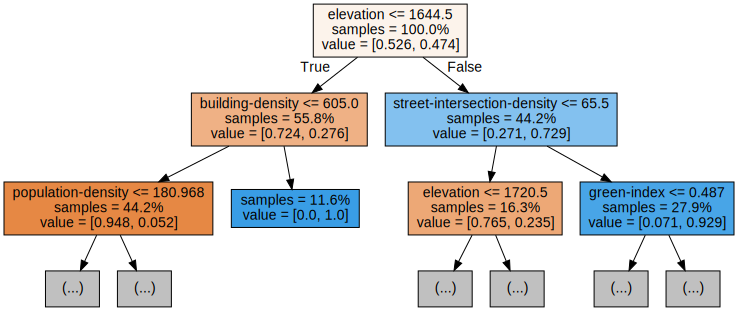

In [19]:
# Export the first three decision trees from the forest

for i in range(3):
    tree = mypipe.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,  
                               filled=True,  
                               max_depth=2, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

### <span style="color:green">More Evaluation, Confusion Matrix</span>

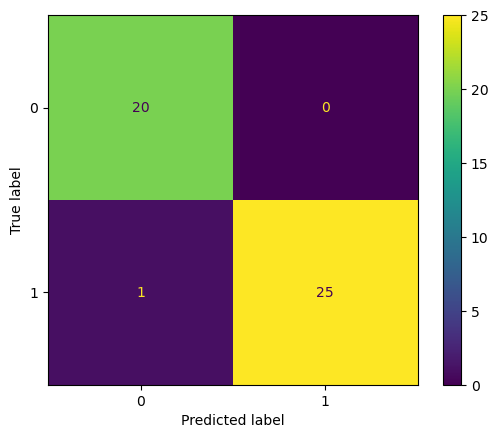

In [20]:
# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [21]:
print(cm)

[[20  0]
 [ 1 25]]


In [22]:
# Evaluating with accuracy, precision and recall
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.9782608695652174
Precision: 1.0
Recall: 0.9615384615384616


<Axes: >

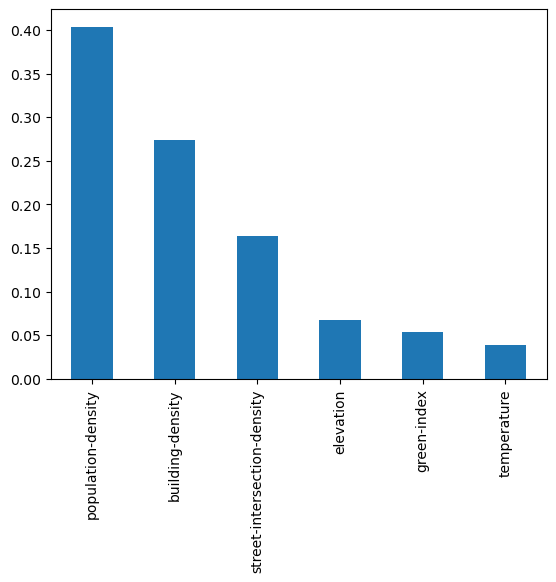

In [23]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(mypipe.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot a simple bar chart
feature_importances.plot.bar()